Polynomial Kernel SVM Train Accuracy: 0.72
Polynomial Kernel SVM Test Accuracy: 0.47


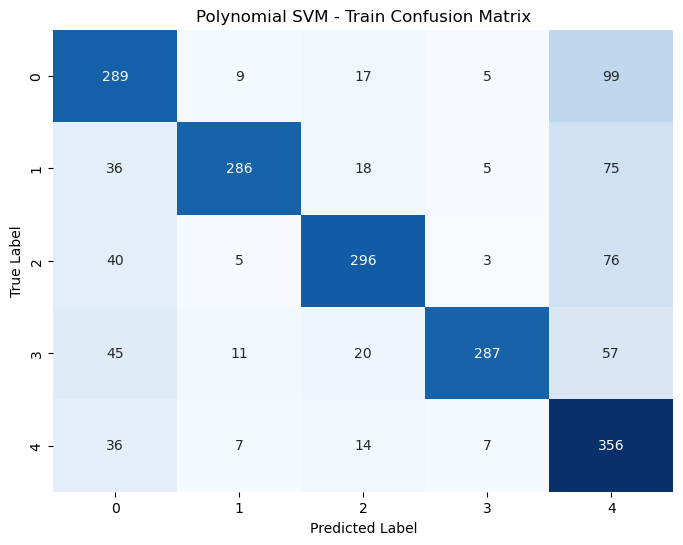

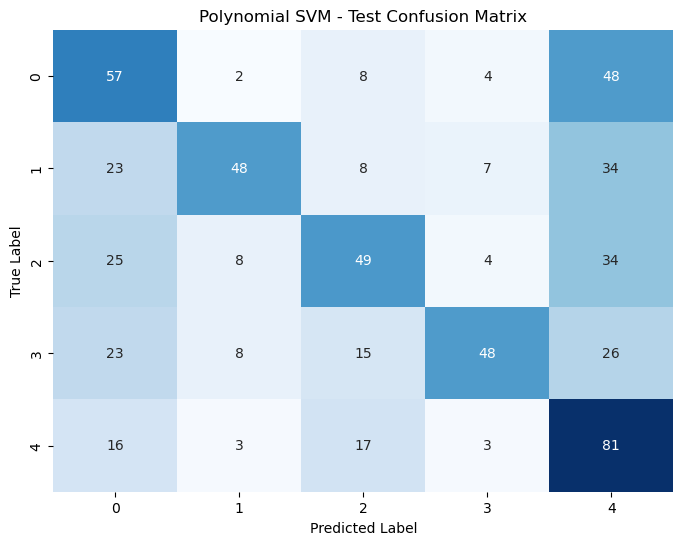

Gaussian Kernel SVM Train Accuracy: 0.85
Gaussian Kernel SVM Test Accuracy: 0.55


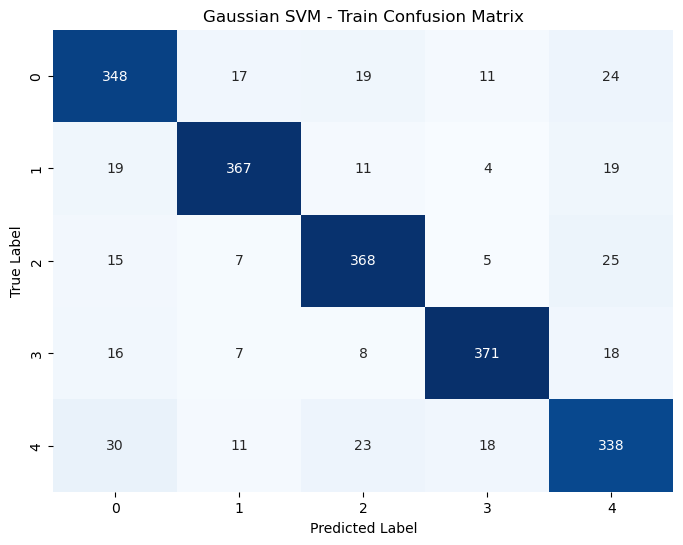

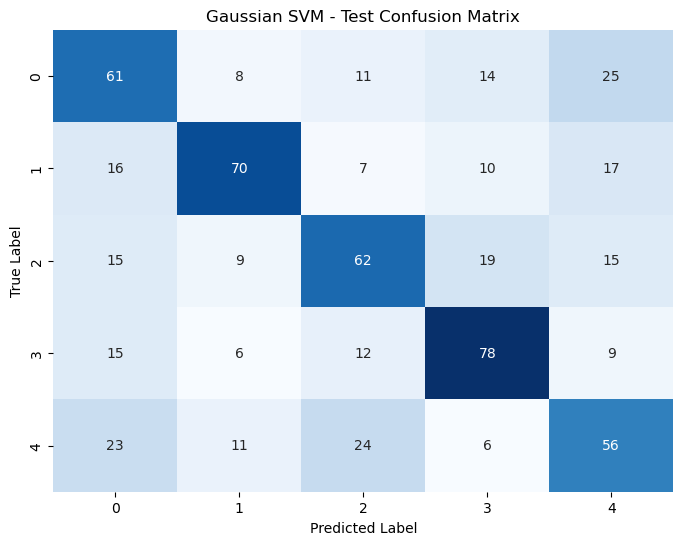


Polynomial Kernel SVM Support Vector Analysis:
Total Support Vectors: 1841
Bounded Support Vectors: 1539 (83.60%)
Unbounded Support Vectors: 302 (16.40%)

Gaussian Kernel SVM Support Vector Analysis:
Total Support Vectors: 1961
Bounded Support Vectors: 1654 (84.34%)
Unbounded Support Vectors: 307 (15.66%)

Overall Results:
            Model  Train Accuracy  Test Accuracy
0  Polynomial SVM        0.721296       0.472454
1    Gaussian SVM        0.853740       0.545910


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
x_train = pd.read_csv('Dataset-3/train_data.csv').values
y_train = pd.read_csv('Dataset-3/train_label.csv').values.ravel()
x_test = pd.read_csv('Dataset-3/test_data.csv').values
y_test = pd.read_csv('Dataset-3/test_label.csv').values.ravel()
x_val = pd.read_csv('Dataset-3/val_data.csv').values
y_val = pd.read_csv('Dataset-3/val_label.csv').values.ravel()

# Step 1: Perform PCA for Dimensionality Reduction
pca = PCA(n_components=20)  # Adjust number of components based on explained variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_val_pca = pca.transform(x_val)

# Step 2: Define and Train Polynomial and Gaussian Kernel SVMs

# Polynomial Kernel SVM
poly_svm = SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(x_train_pca, y_train)
y_train_pred_poly = poly_svm.predict(x_train_pca)
y_test_pred_poly = poly_svm.predict(x_test_pca)

# Gaussian Kernel SVM
gaussian_svm = SVC(kernel='rbf', gamma=10, C=1)
gaussian_svm.fit(x_train_pca, y_train)
y_train_pred_gauss = gaussian_svm.predict(x_train_pca)
y_test_pred_gauss = gaussian_svm.predict(x_test_pca)

# Step 3: Compute Accuracies and Confusion Matrices

# Polynomial Kernel SVM Results
poly_train_acc = accuracy_score(y_train, y_train_pred_poly)
poly_test_acc = accuracy_score(y_test, y_test_pred_poly)
poly_train_cm = confusion_matrix(y_train, y_train_pred_poly)
poly_test_cm = confusion_matrix(y_test, y_test_pred_poly)

# Gaussian Kernel SVM Results
gauss_train_acc = accuracy_score(y_train, y_train_pred_gauss)
gauss_test_acc = accuracy_score(y_test, y_test_pred_gauss)
gauss_train_cm = confusion_matrix(y_train, y_train_pred_gauss)
gauss_test_cm = confusion_matrix(y_test, y_test_pred_gauss)

# Display Confusion Matrices as Heatmaps
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

print(f"Polynomial Kernel SVM Train Accuracy: {poly_train_acc:.2f}")
print(f"Polynomial Kernel SVM Test Accuracy: {poly_test_acc:.2f}")
plot_confusion_matrix(poly_train_cm, "Polynomial SVM - Train Confusion Matrix")
plot_confusion_matrix(poly_test_cm, "Polynomial SVM - Test Confusion Matrix")

print(f"Gaussian Kernel SVM Train Accuracy: {gauss_train_acc:.2f}")
print(f"Gaussian Kernel SVM Test Accuracy: {gauss_test_acc:.2f}")
plot_confusion_matrix(gauss_train_cm, "Gaussian SVM - Train Confusion Matrix")
plot_confusion_matrix(gauss_test_cm, "Gaussian SVM - Test Confusion Matrix")

# Step 4: Analyze Support Vectors for Each SVM Model

def calculate_support_vectors(svm, model_name):
    n_support_vectors = len(svm.support_)
    # Bounded support vectors are those with non-zero coefficients
    bounded_sv = np.sum(svm.dual_coef_[0] != 0)  # Check only the first class coefficients for binary or multi-class
    unbounded_sv = n_support_vectors - bounded_sv
    bounded_percentage = (bounded_sv / n_support_vectors) * 100
    unbounded_percentage = (unbounded_sv / n_support_vectors) * 100

    print(f"\n{model_name} Support Vector Analysis:")
    print(f"Total Support Vectors: {n_support_vectors}")
    print(f"Bounded Support Vectors: {bounded_sv} ({bounded_percentage:.2f}%)")
    print(f"Unbounded Support Vectors: {unbounded_sv} ({unbounded_percentage:.2f}%)")

# Support Vector Analysis
calculate_support_vectors(poly_svm, "Polynomial Kernel SVM")
calculate_support_vectors(gaussian_svm, "Gaussian Kernel SVM")

# Compile and Display Overall Results
results = {
    "Model": ["Polynomial SVM", "Gaussian SVM"],
    "Train Accuracy": [poly_train_acc, gauss_train_acc],
    "Test Accuracy": [poly_test_acc, gauss_test_acc],
}

results_df = pd.DataFrame(results)
print("\nOverall Results:")
print(results_df)
